# Explore here

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
datos = pd.read_csv(url, sep=";")

# Mostrar las primeras filas del DataFrame
datos.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
datos.shape

(41188, 21)

In [73]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [74]:
datos.duplicated().sum()

np.int64(12)

In [75]:
data_limpio = datos.drop_duplicates()
print(data_limpio.shape)
data_limpio.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [122]:
# num_cols = data_limpio.select_dtypes(include=['int64', 'float64']).columns
# cat_cols = data_limpio.select_dtypes(include=['object']).columns

cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
num_cols = ["age", "duration", "campaign", "pdays", "previous",'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = ["y"]

print(num_cols)
print(cat_cols)
print(target)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['y']


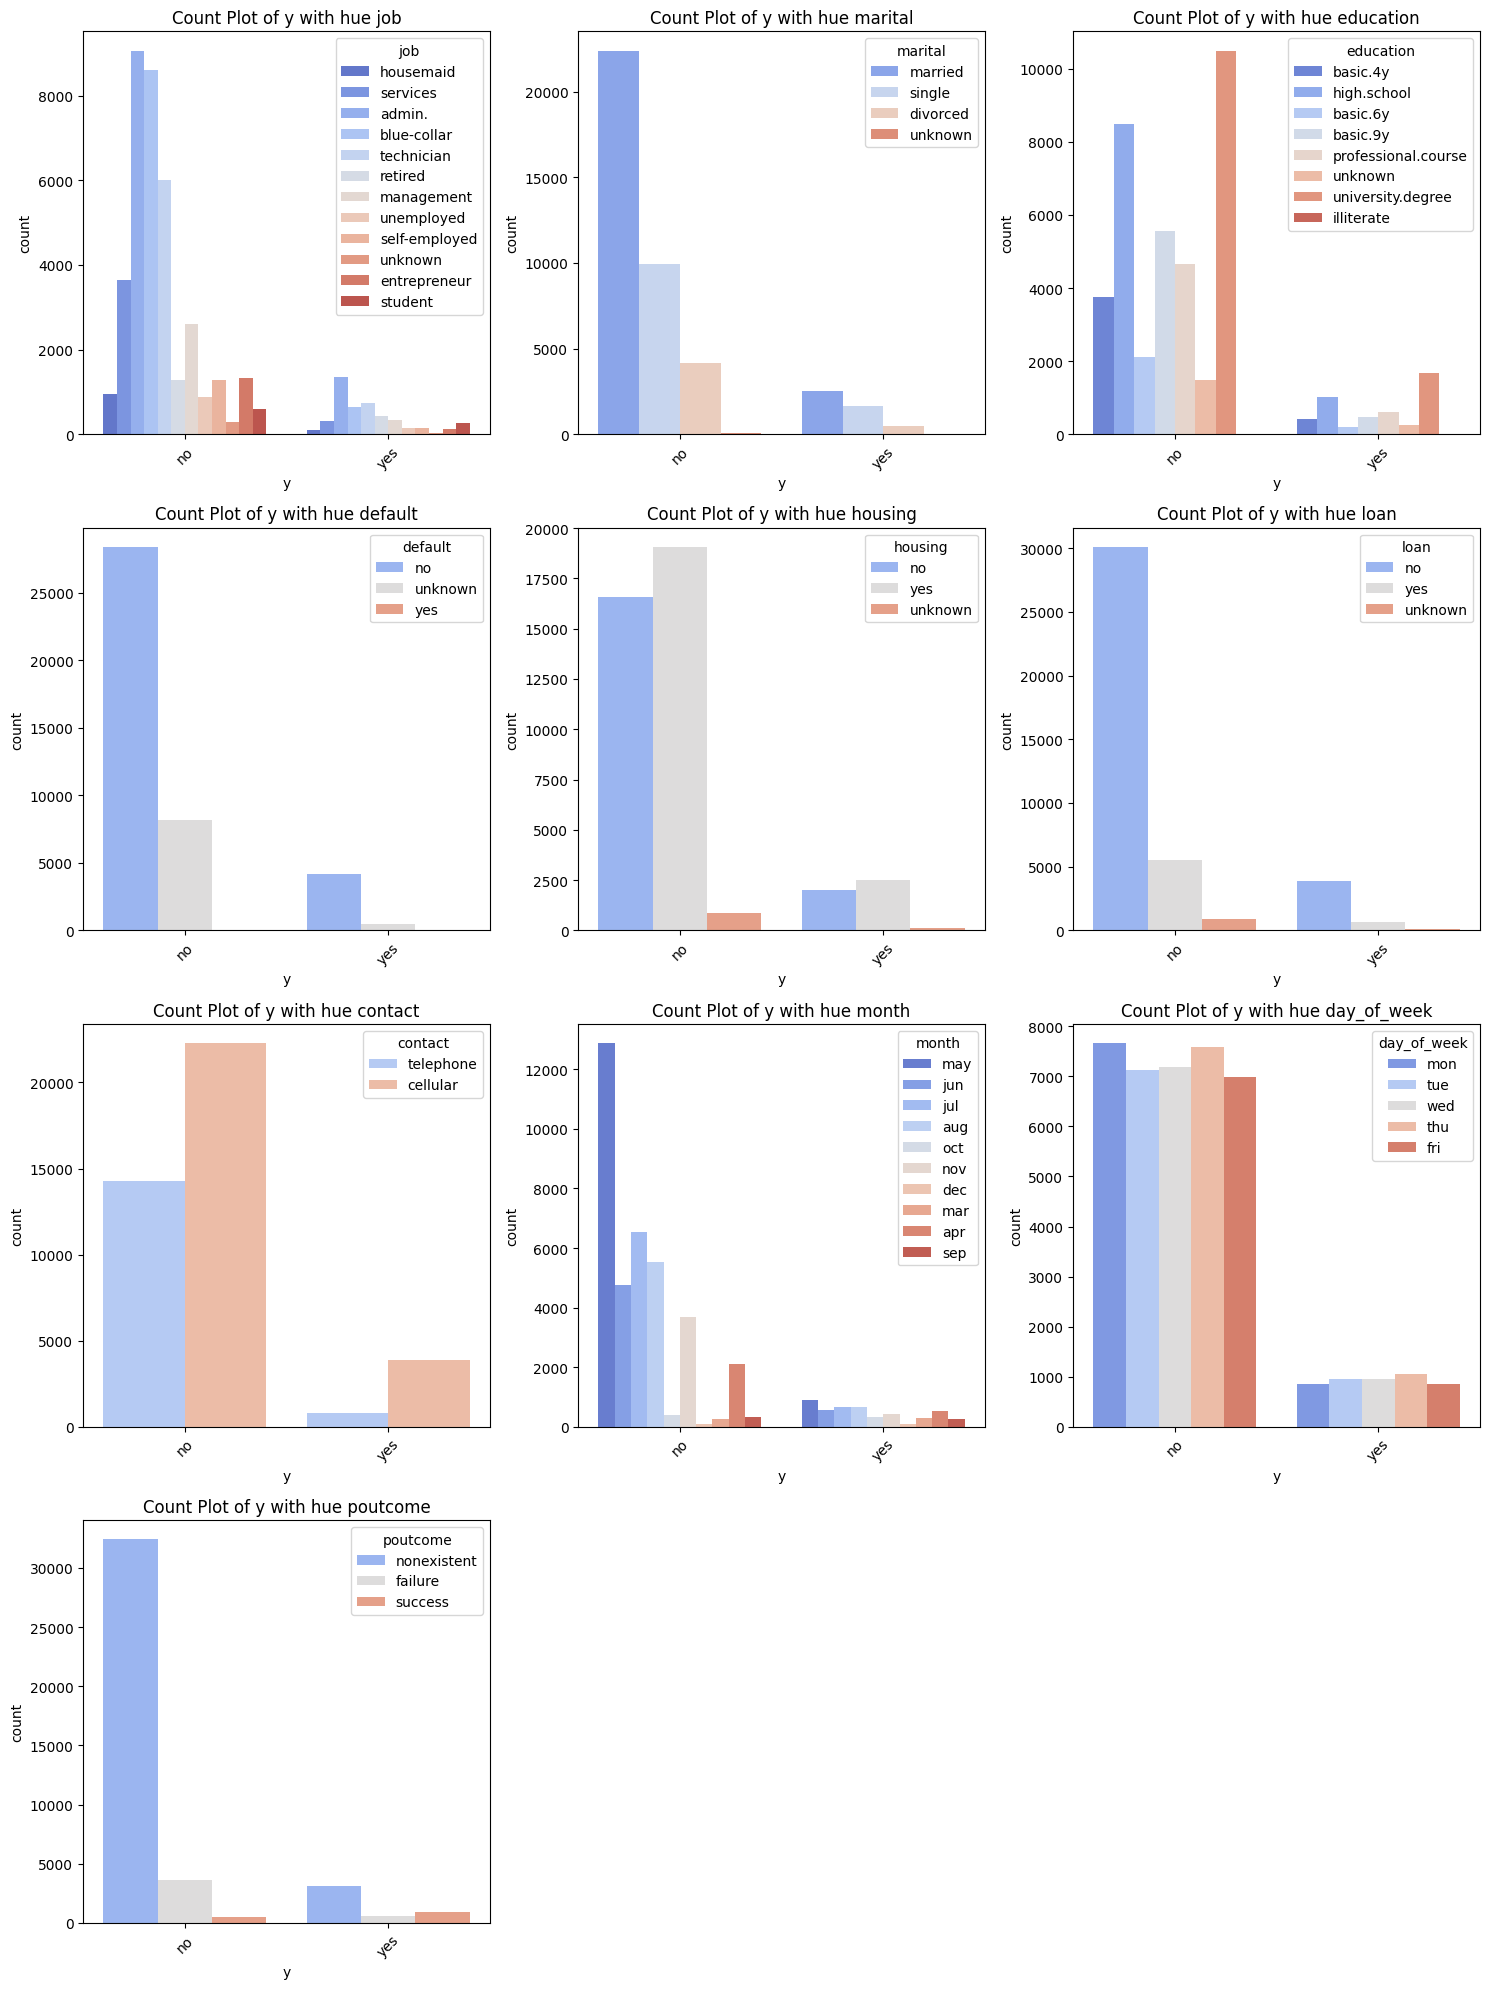

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Lista de columnas a graficar
columns = cat_cols

# Fijar el número de columnas a 3
num_cols = 3

# Calcular el número de filas necesarias
num_rows = math.ceil(len(columns) / num_cols)

# Crear la figura con subgráficos (axes) y un tamaño más grande
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Ajusta el tamaño de la figura

# Asegurarse de que 'axes' sea una lista bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(columns):
            sns.countplot(data=datos, x="y", hue=columns[col_index], palette="coolwarm", ax=axes[row][col])
            axes[row][col].set_title(f"Count Plot of y with hue {columns[col_index]}")
            axes[row][col].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para que queden dentro
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Eliminar gráficos vacíos si hay menos de 3 columnas

# Ajustar el espaciado entre los gráficos
plt.tight_layout()  # Ajuste automático del espacio para evitar que se solapen

# Mostrar la figura
plt.show()


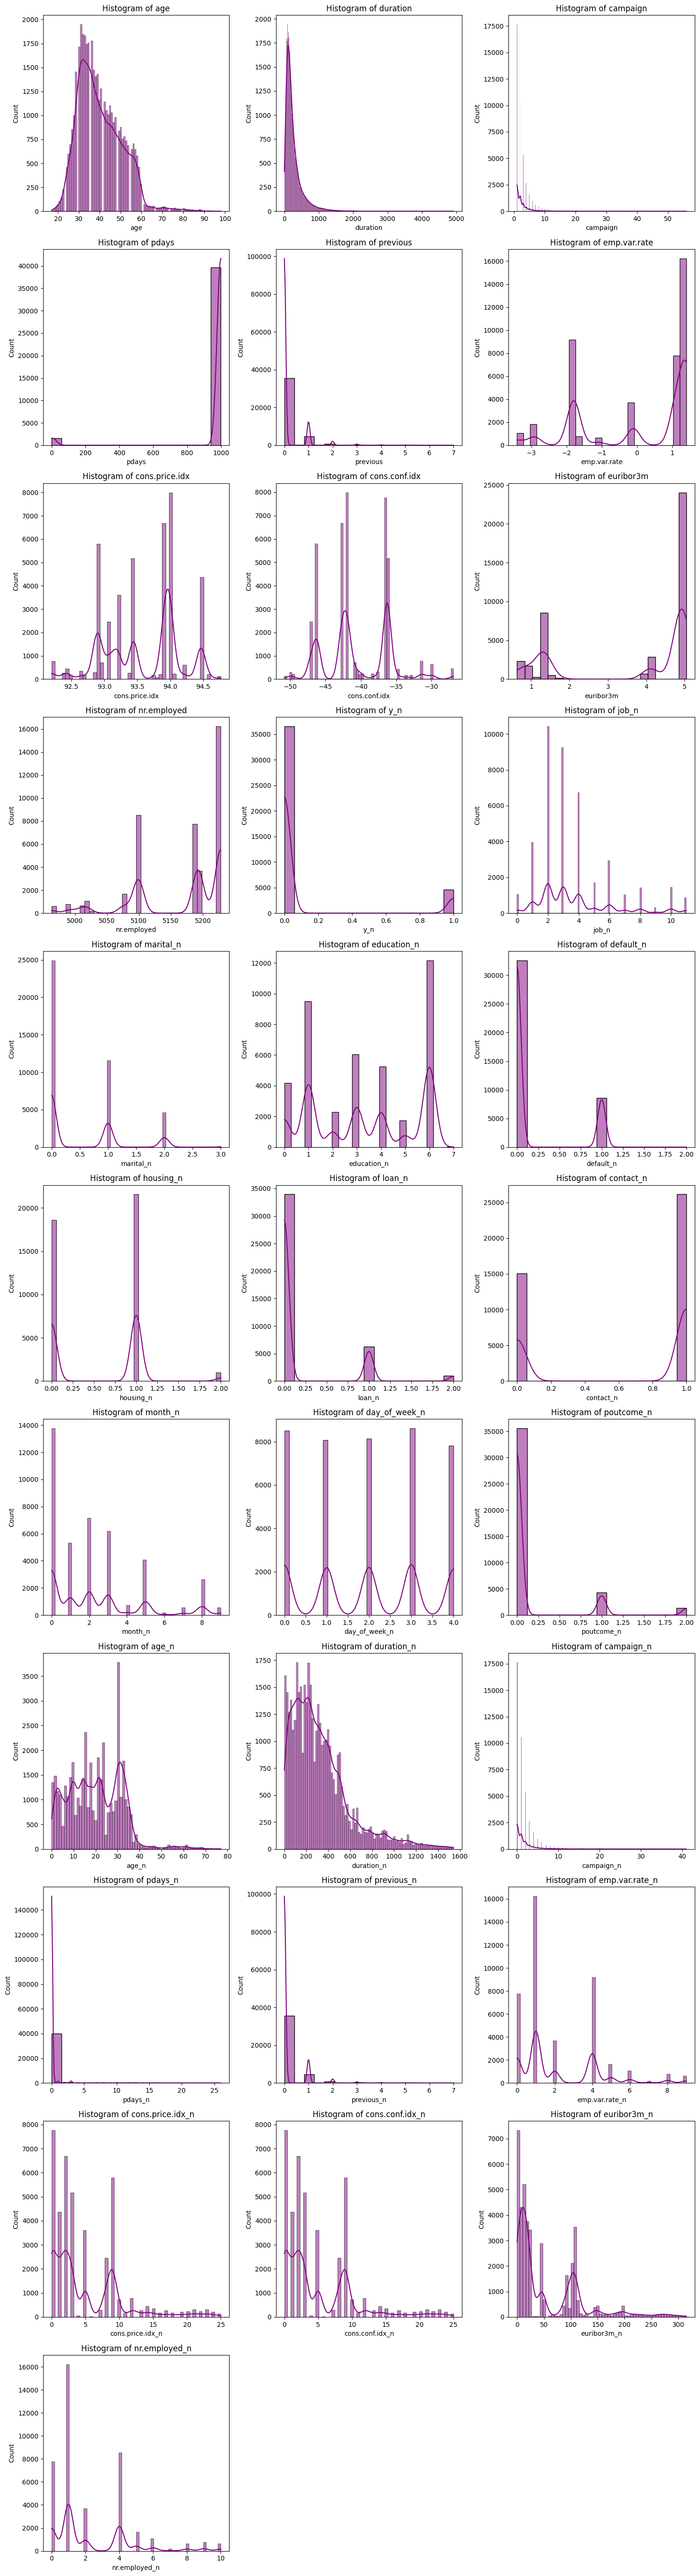

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identificar columnas numéricas
num_cols = data_limpio.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Convertir a lista

# Fijar el número de columnas por fila a 3
cols_per_row = 3

# Calcular el número de filas necesarias
num_rows = math.ceil(len(num_cols) / cols_per_row)

# Crear la figura con subgráficos (axes) y un tamaño más grande
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Asegurarse de que 'axes' sea una lista bidimensional
axes = axes.reshape(num_rows, cols_per_row) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(cols_per_row):
        if col_index < len(num_cols):
            # Histograma para cada columna numérica
            sns.histplot(data=data_limpio, x=num_cols[col_index], kde=True, ax=axes[row][col], color='purple')
            axes[row][col].set_title(f"Histogram of {num_cols[col_index]}")
            axes[row][col].set_xlabel(num_cols[col_index])  # Etiqueta el eje x con el nombre de la columna
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Eliminar gráficos vacíos si hay menos de 3 columnas

# Ajustar el espaciado entre los gráficos
plt.tight_layout()  # Ajuste automático del espacio para evitar que se solapen

# Mostrar la figura
plt.show()

In [125]:
#target = ["y"]
norm_target = "y_n"

# Asegúrate de que no haya valores nulos en "y"
data_limpio.loc[:, "y"] = data_limpio["y"].fillna("Desconocido")

# Codificar la variable "y" y asignar el resultado a la nueva columna "y_n"
data_limpio.loc[:, norm_target] = pd.factorize(data_limpio["y"])[0]

# Crear el diccionario de reglas de codificación
target_rules = {row["y"]: row["y_n"] for _, row in data_limpio[["y", "y_n"]].drop_duplicates().iterrows()}

# Guardar las reglas en un archivo JSON
import json
with open("../models/target_rules.json", "w") as f:
    json.dump(target_rules, f)

# Ver las primeras filas de la columna "y_n"
print(data_limpio[norm_target].head())


0    0
1    0
2    0
3    0
4    0
Name: y_n, dtype: int64


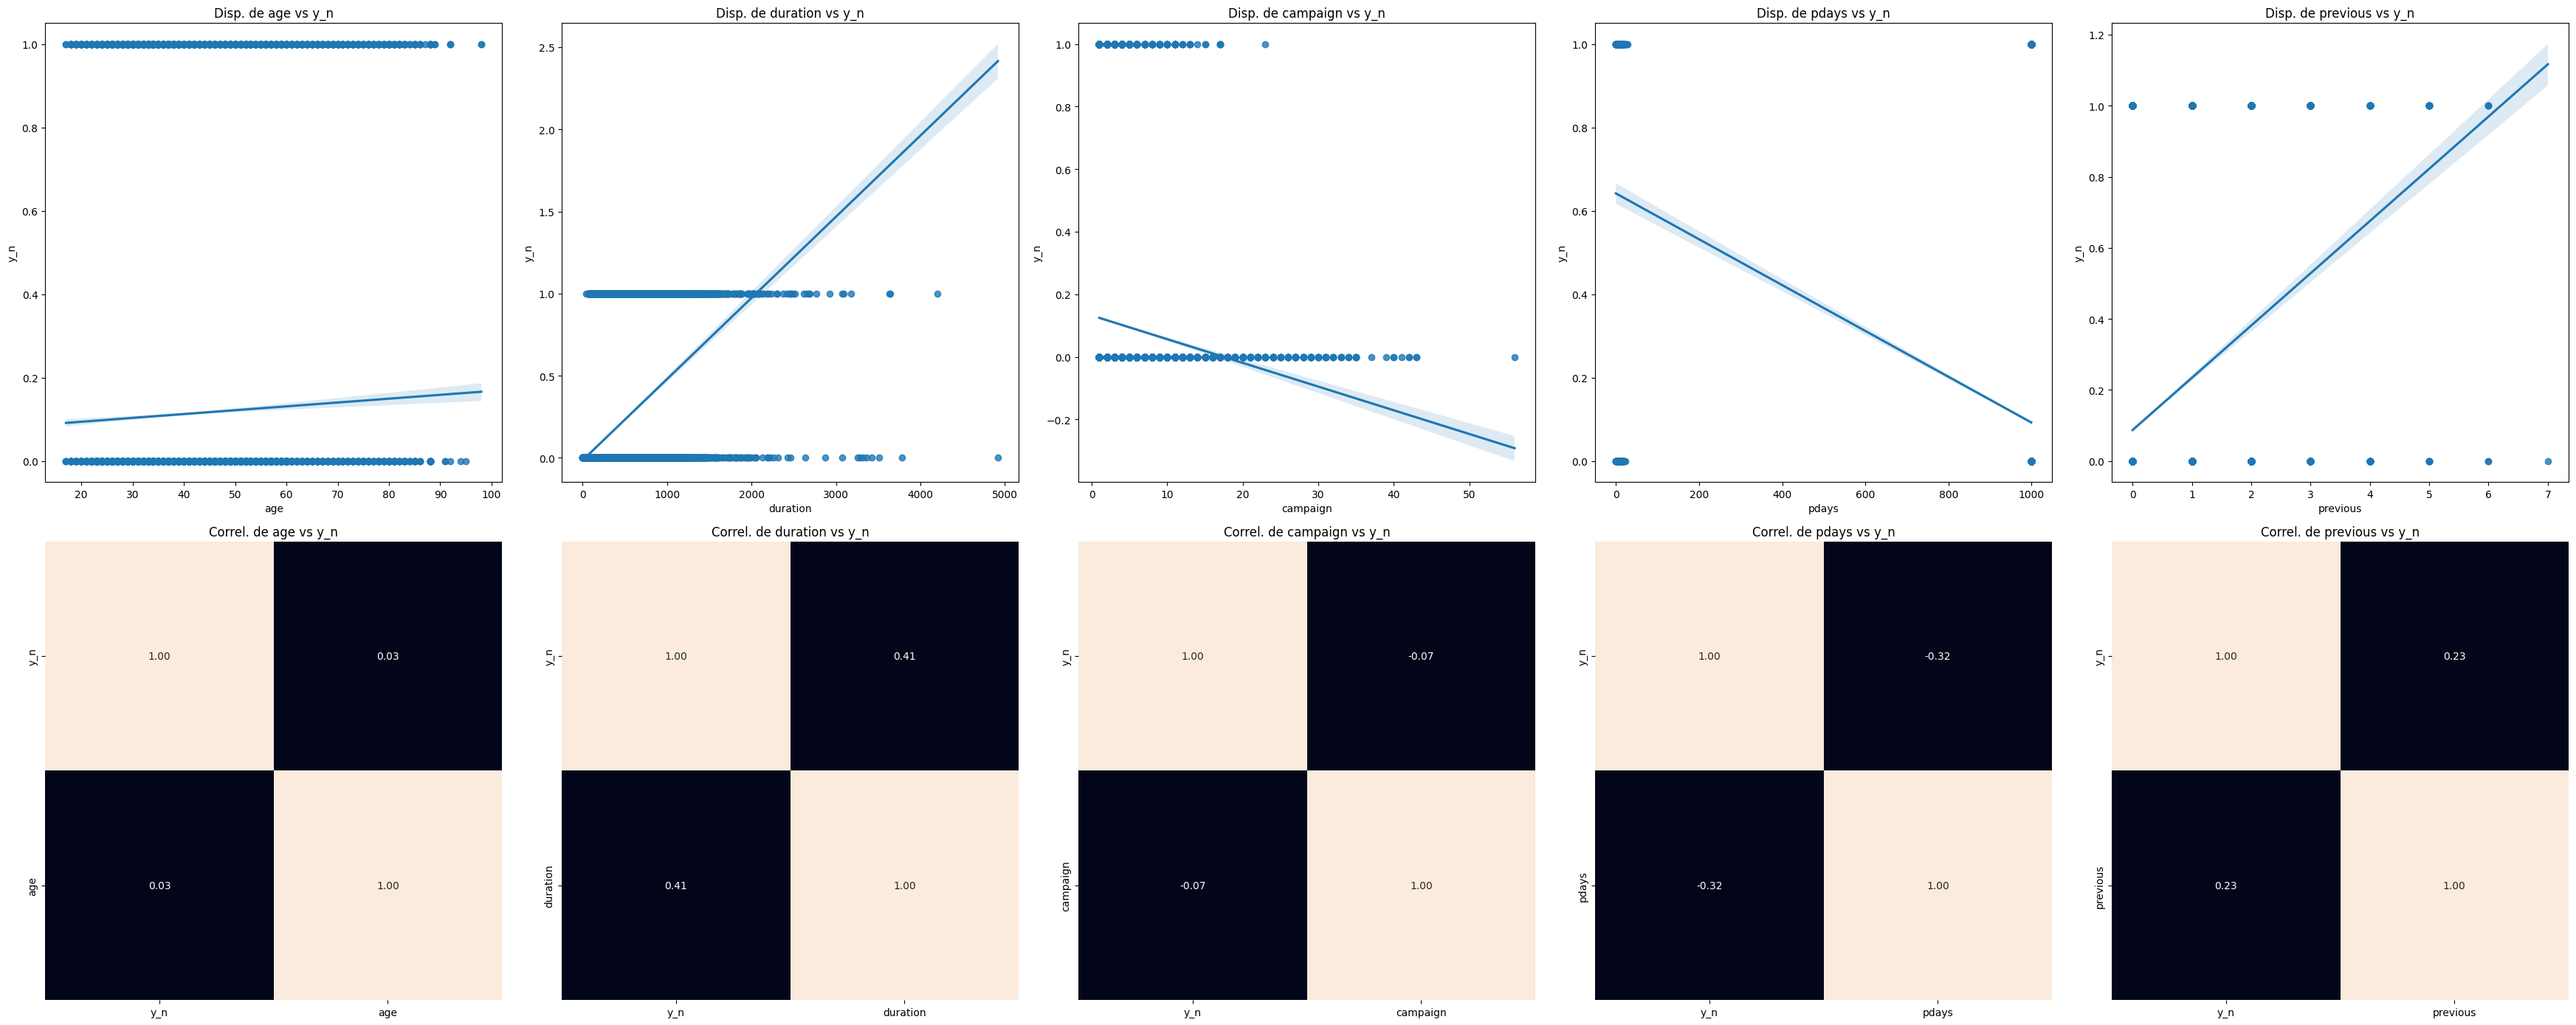

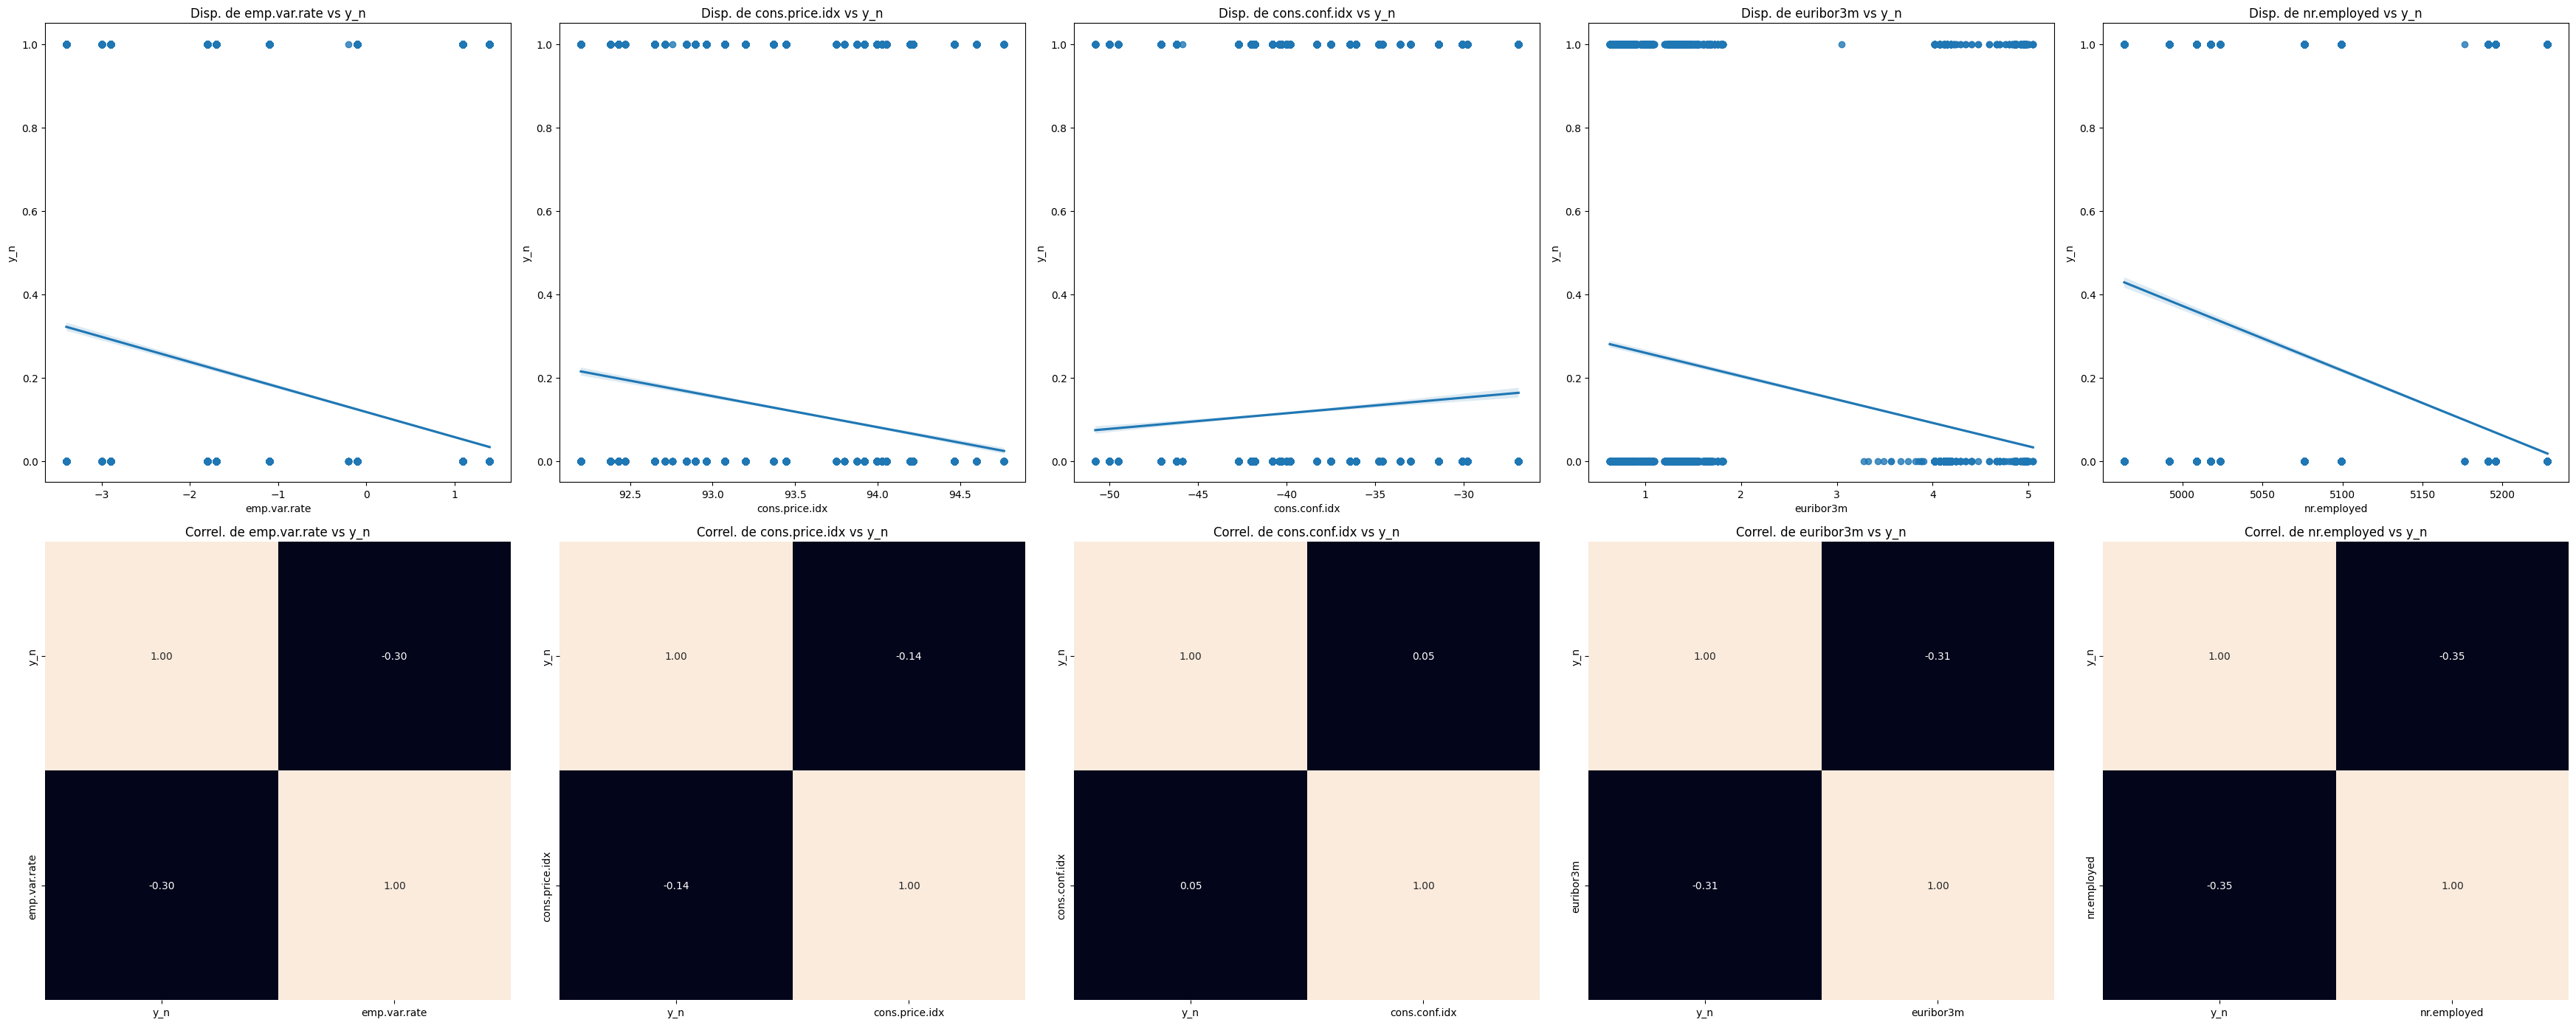

In [126]:
# def graficar_heatmap_y_dispersion(df, columnas, target_col):
   
#     # 1. Heatmap de correlación
#     plt.figure(figsize=(8, 6))  # Tamaño de la figura
#     sns.heatmap(df[columnas + [target_col]].corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True,linewidths=0.5)

#     plt.title("Heatmap de Correlación", fontsize=14)
#     plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
#     plt.tight_layout()  # Ajustar el layout
#     plt.show()

#     # 2. Gráfico de dispersión (scatter plot)
#     for col in columnas:
#         plt.figure(figsize=(6, 4))  # Tamaño de la figura
#         sns.scatterplot(data=data_limpio, x=col,y=target_col, alpha=0.5, color="blue")
        
#         plt.title(f'Dispersión: {col} vs {target_col}', fontsize=12)
#         plt.xlabel(col, fontsize=10)
#         plt.ylabel(target_col, fontsize=10)
#         plt.tight_layout()  # Ajustar el layout
#         plt.show()

# graficar_dispersiones_y_heatmaps(data_limpio, num_cols[0:5], norm_target)
# graficar_dispersiones_y_heatmaps(data_limpio, num_cols[5:10], norm_target)

def graficar_dispersiones_y_heatmaps(df, columnas, target_col):
   
    n = len(columnas)  
    n_columnas = 5  
    n_filas = 2  
    
    # Crear la figura con el número dinámico de filas y columnas
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 7, n_filas * 7))
    
    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()
    
    # Graficar los gráficos de dispersión (regplot) y mapas de calor (heatmap)
    for i, col in enumerate(columnas):
        # Regplot (Gráfico de dispersión) en la fila 0
        sns.regplot(ax=axis[i], data=data_limpio, x=col, y=target_col)
        axis[i].set_title(f'Disp. de {col} vs {target_col}')
        
        # Heatmap de la correlación en la fila 1
        sns.heatmap(df[[target_col, col]].corr(), annot=True, fmt=".2f", ax=axis[i + n_columnas], cbar=False)
        axis[i + n_columnas].set_title(f'Correl. de {col} vs {target_col}')
    
    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

### Segmentar por "n_columns" para que salgan los hisplots/boxplots.

graficar_dispersiones_y_heatmaps(data_limpio, num_cols[0:5], norm_target)
graficar_dispersiones_y_heatmaps(data_limpio, num_cols[5:10], norm_target)

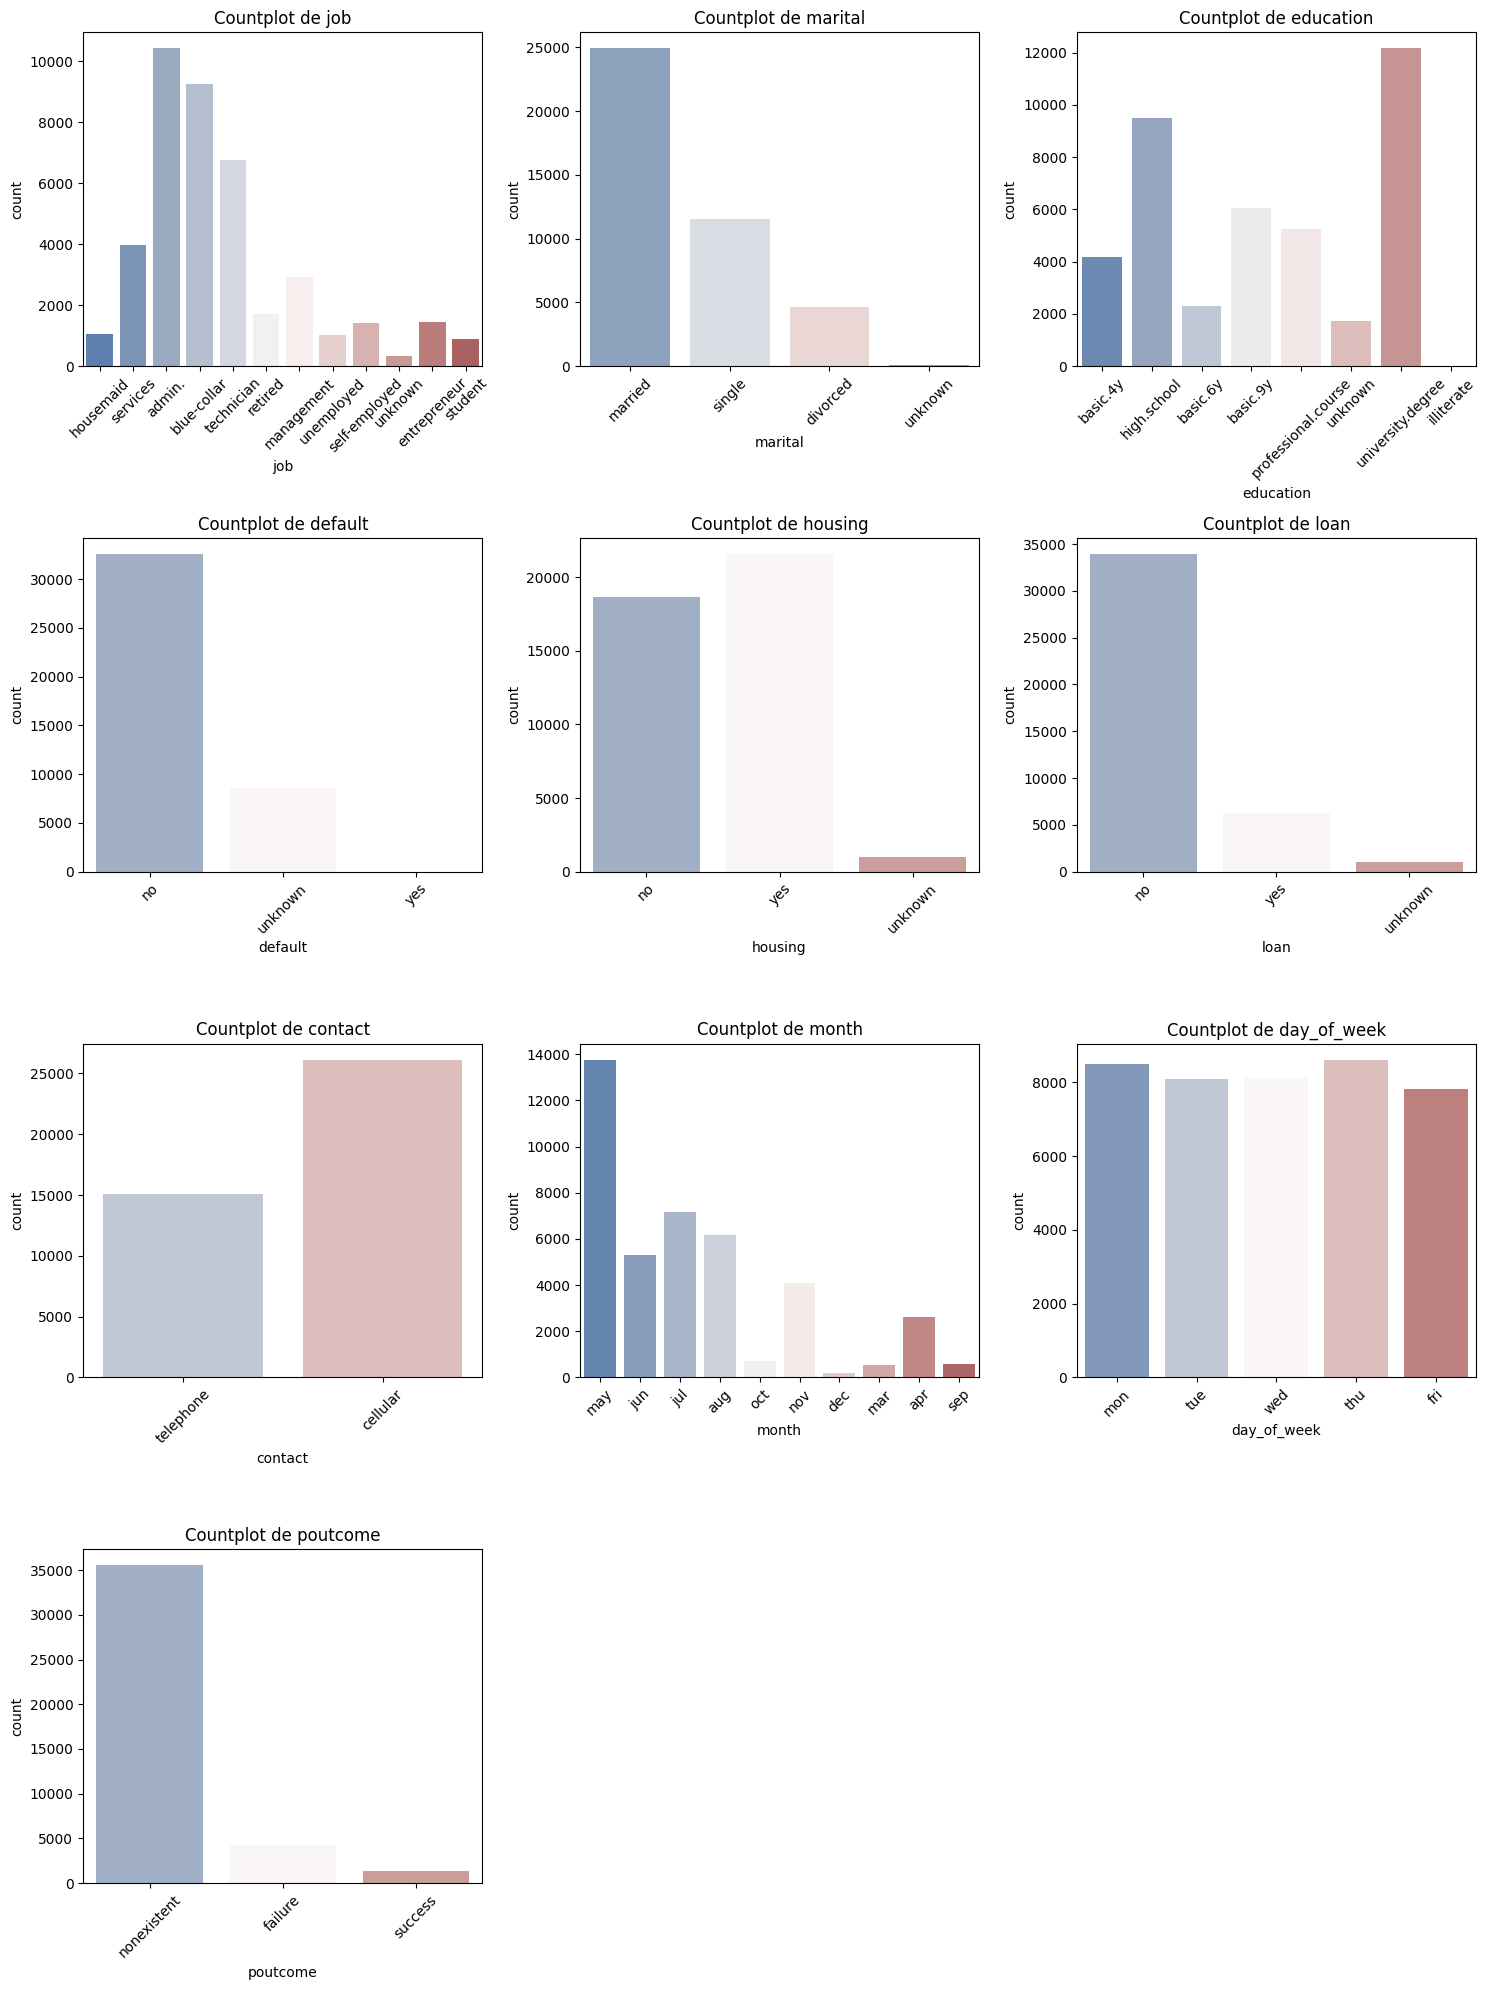

In [127]:
def graficar_countplots(df, cat_cols, cols_per_row=3):

    # Calcular el número de filas necesarias
    n = len(cat_cols)
    num_rows = math.ceil(n / cols_per_row)

    # Crear la figura con subgráficos (axes) y un tamaño más grande
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

    # Aplanar el array de ejes para facilitar la iteración
    axes = axes.flatten() if num_rows > 1 else [axes]

    # Generar los countplots
    for i, col in enumerate(cat_cols):
        if i < len(axes):  # Verificar que el índice esté dentro del rango de ejes
            sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette="vlag", legend=False)
            axes[i].set_title(f'Countplot de {col}', fontsize=12)
            axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x
        else:
            break  # Salir del bucle si no hay más ejes disponibles

    # Ocultar ejes vacíos si hay menos columnas que cols_per_row * num_rows
    for j in range(n, cols_per_row * num_rows):
        if j < len(axes):  # Verificar que el índice esté dentro del rango de ejes
            fig.delaxes(axes[j])

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

# Graficar countplots
graficar_countplots(datos, cat_cols, cols_per_row=3)

In [101]:
# import pandas as pd
import json

# def automatizar_factorizacion(df, columnas):
#     transformacion_reglas = {}
#     col_factorizadas = []
    
#     # Iterar sobre las columnas especificadas para la factorización
#     for col in columnas:
#         # Aplicar la factorización y agregar la columna al DataFrame de forma segura usando .loc
#         df.loc[:, f"{col}_n"] = pd.factorize(df[col])[0]
        
#         # Agregar el nombre de la columna factorizada a la lista
#         col_factorizadas.append(f"{col}_n")
        
#         # Guardar las reglas de transformación para la columna actual en el diccionario
#         transformacion_reglas[col] = {row[col]: row[f"{col}_n"] for _, row in df[[col, f"{col}_n"]].drop_duplicates().iterrows()}
    
#     # Guardar el diccionario de reglas en un archivo JSON
#     with open("../models/transformacion_reglas.json", "w") as f:
#         json.dump(transformacion_reglas, f)
    
#     print("Factorización completada y reglas guardadas en 'transformacion_reglas.json'.")
    
#     # Retornar el DataFrame actualizado con las nuevas columnas numéricas y la lista de columnas factorizadas
#     return df, col_factorizadas

# # Asegúrate de que 'cat_cols' contenga las columnas categóricas que deseas factorizar
# cat_cols = data_limpio.select_dtypes(include=['object']).columns

# # Llamar a la función para automatizar la factorización
# data_limpio, col_factorizadas = automatizar_factorizacion(data_limpio, cat_cols)

# # Imprimir las columnas que han sido factorizadas
# print("Columnas factorizadas:", col_factorizadas)

# # Para revisar el archivo JSON guardado, puedes cargarlo y mostrarlo de forma legible:
# with open("../models/transformacion_reglas.json", "r") as f:
#     reglas = json.load(f)
#     print(json.dumps(reglas, indent=4))  # Imprimir el archivo JSON de forma legible

def automatizar_factorizacion(df, columnas):
    transformacion_reglas = {}
    col_factorizadas = []
    
    # Iterar sobre las columnas especificadas para la factorización
    for col in columnas:
        # Aplicar la factorización y agregar la columna al DataFrame
        df[f"{col}_n"] = pd.factorize(df[col])[0]
        
        # Agregar el nombre de la columna factorizada a la lista
        col_factorizadas.append(f"{col}_n")
        
        # Guardar las reglas de transformación para la columna actual en el diccionario
        transformacion_reglas[col] = {str(row[col]): row[f"{col}_n"] for _, row in df[[col, f"{col}_n"]].drop_duplicates().iterrows()}
    
    # Guardar el diccionario de reglas en un archivo JSON
    with open("../models/transformacion_reglas.json", "w") as f:
        json.dump(transformacion_reglas, f)
    
    print("Factorización completada y reglas guardadas en 'transformacion_reglas.json'.")
    
    # Retornar el DataFrame actualizado con las nuevas columnas numéricas y la lista de columnas factorizadas
    return df, col_factorizadas

# Asegúrate de que 'data_limpia' está definida antes de llamarla
data_limpia = datos.copy()  # o el procesamiento previo que hayas hecho

# Asegúrate de que 'num_cols' son las columnas que quieres factorizar
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Llamar a la función para automatizar la factorización
data_limpia, col_factorizadas = automatizar_factorizacion(data_limpia, cat_cols)

# Imprimir las columnas que han sido factorizadas
print("Columnas factorizadas:", col_factorizadas)


Factorización completada y reglas guardadas en 'transformacion_reglas.json'.
Columnas factorizadas: ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n']


In [134]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y_n',
 'job_n',
 'marital_n',
 'education_n',
 'default_n',
 'housing_n',
 'loan_n',
 'contact_n',
 'month_n',
 'day_of_week_n',
 'poutcome_n',
 'age_n',
 'duration_n',
 'campaign_n',
 'pdays_n',
 'previous_n',
 'emp.var.rate_n',
 'cons.price.idx_n',
 'cons.conf.idx_n',
 'euribor3m_n',
 'nr.employed_n']

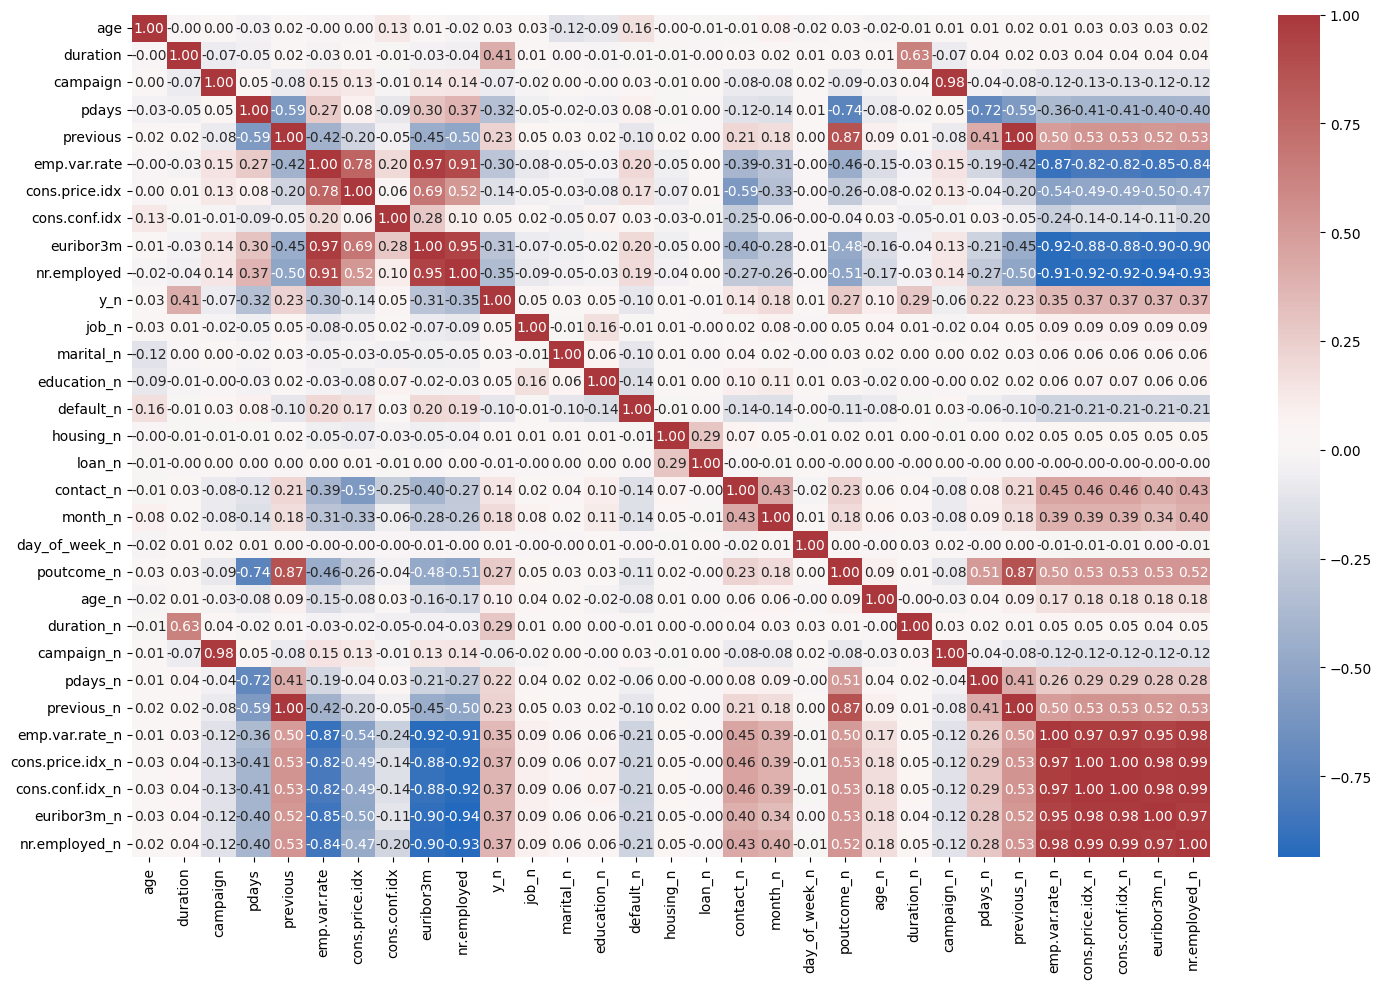

In [138]:
fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(data_limpio[num_cols].corr(), annot = True, fmt = ".2f", cmap = "vlag")

plt.tight_layout()

plt.show()

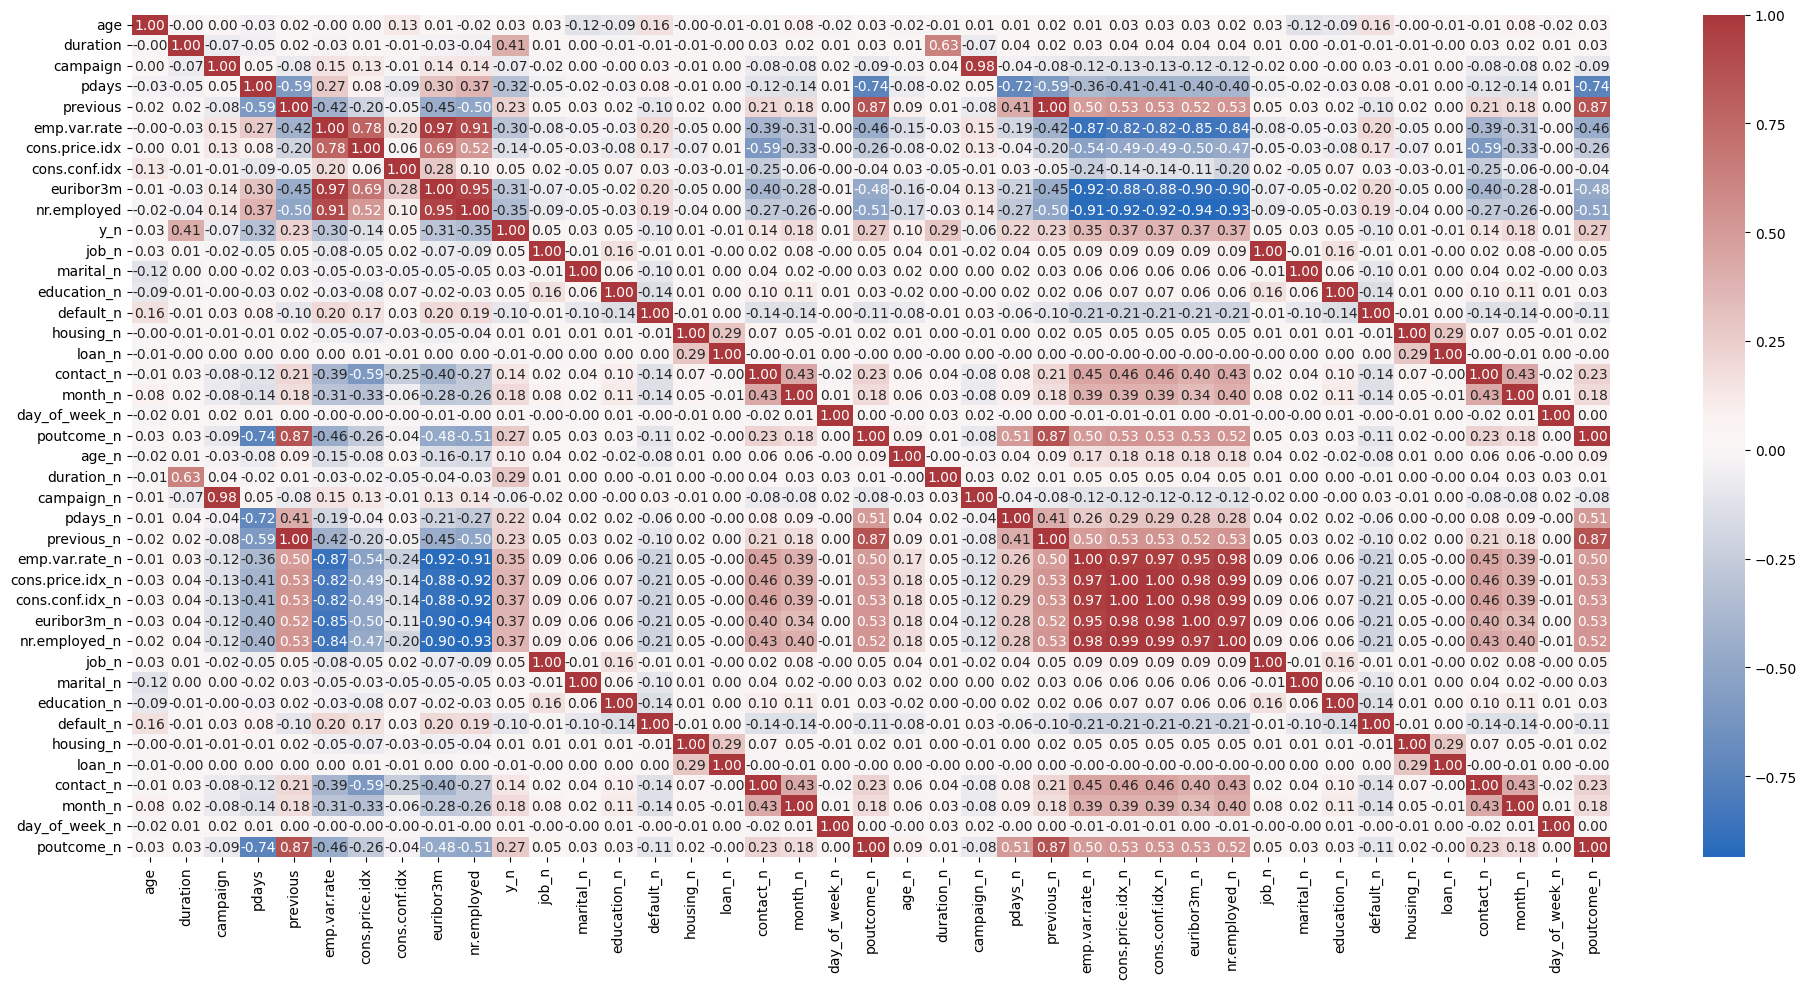

In [129]:
fig, axis = plt.subplots(figsize = (20, 10))

sns.heatmap(data_limpio[num_cols + col_factorizadas].corr(), annot = True, fmt = ".2f", cmap = "vlag")

plt.tight_layout()

plt.show()

In [139]:
# n_data = data_limpio.drop(columns= cat_cols + target)
# n_data

print(data_limpio.columns)
print(target)
print(cat_cols + target)

n_data = data_limpio.drop(columns=cat_cols + target, errors='ignore')
n_data

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_n', 'job_n',
       'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age_n',
       'duration_n', 'campaign_n', 'pdays_n', 'previous_n', 'emp.var.rate_n',
       'cons.price.idx_n', 'cons.conf.idx_n', 'euribor3m_n', 'nr.employed_n'],
      dtype='object')
['y']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,age_n,duration_n,campaign_n,pdays_n,previous_n,emp.var.rate_n,cons.price.idx_n,cons.conf.idx_n,euribor3m_n,nr.employed_n
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,2,2,0,0,0,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,3,3,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,48,629,0,0,0,9,25,25,315,10
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,12,339,0,0,0,9,25,25,315,10
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,191,1,0,0,9,25,25,315,10
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,23,273,0,0,0,9,25,25,315,10


In [140]:
n_data = data_limpio.select_dtypes(exclude=['object'])
n_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,age_n,duration_n,campaign_n,pdays_n,previous_n,emp.var.rate_n,cons.price.idx_n,cons.conf.idx_n,euribor3m_n,nr.employed_n
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,2,2,0,0,0,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,3,3,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,48,629,0,0,0,9,25,25,315,10
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,12,339,0,0,0,9,25,25,315,10
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,191,1,0,0,9,25,25,315,10
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,23,273,0,0,0,9,25,25,315,10


In [141]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41176 non-null  int64  
 1   duration          41176 non-null  int64  
 2   campaign          41176 non-null  int64  
 3   pdays             41176 non-null  int64  
 4   previous          41176 non-null  int64  
 5   emp.var.rate      41176 non-null  float64
 6   cons.price.idx    41176 non-null  float64
 7   cons.conf.idx     41176 non-null  float64
 8   euribor3m         41176 non-null  float64
 9   nr.employed       41176 non-null  float64
 10  y_n               41176 non-null  int64  
 11  job_n             41176 non-null  int64  
 12  marital_n         41176 non-null  int64  
 13  education_n       41176 non-null  int64  
 14  default_n         41176 non-null  int64  
 15  housing_n         41176 non-null  int64  
 16  loan_n            41176 non-null  int64  
 17

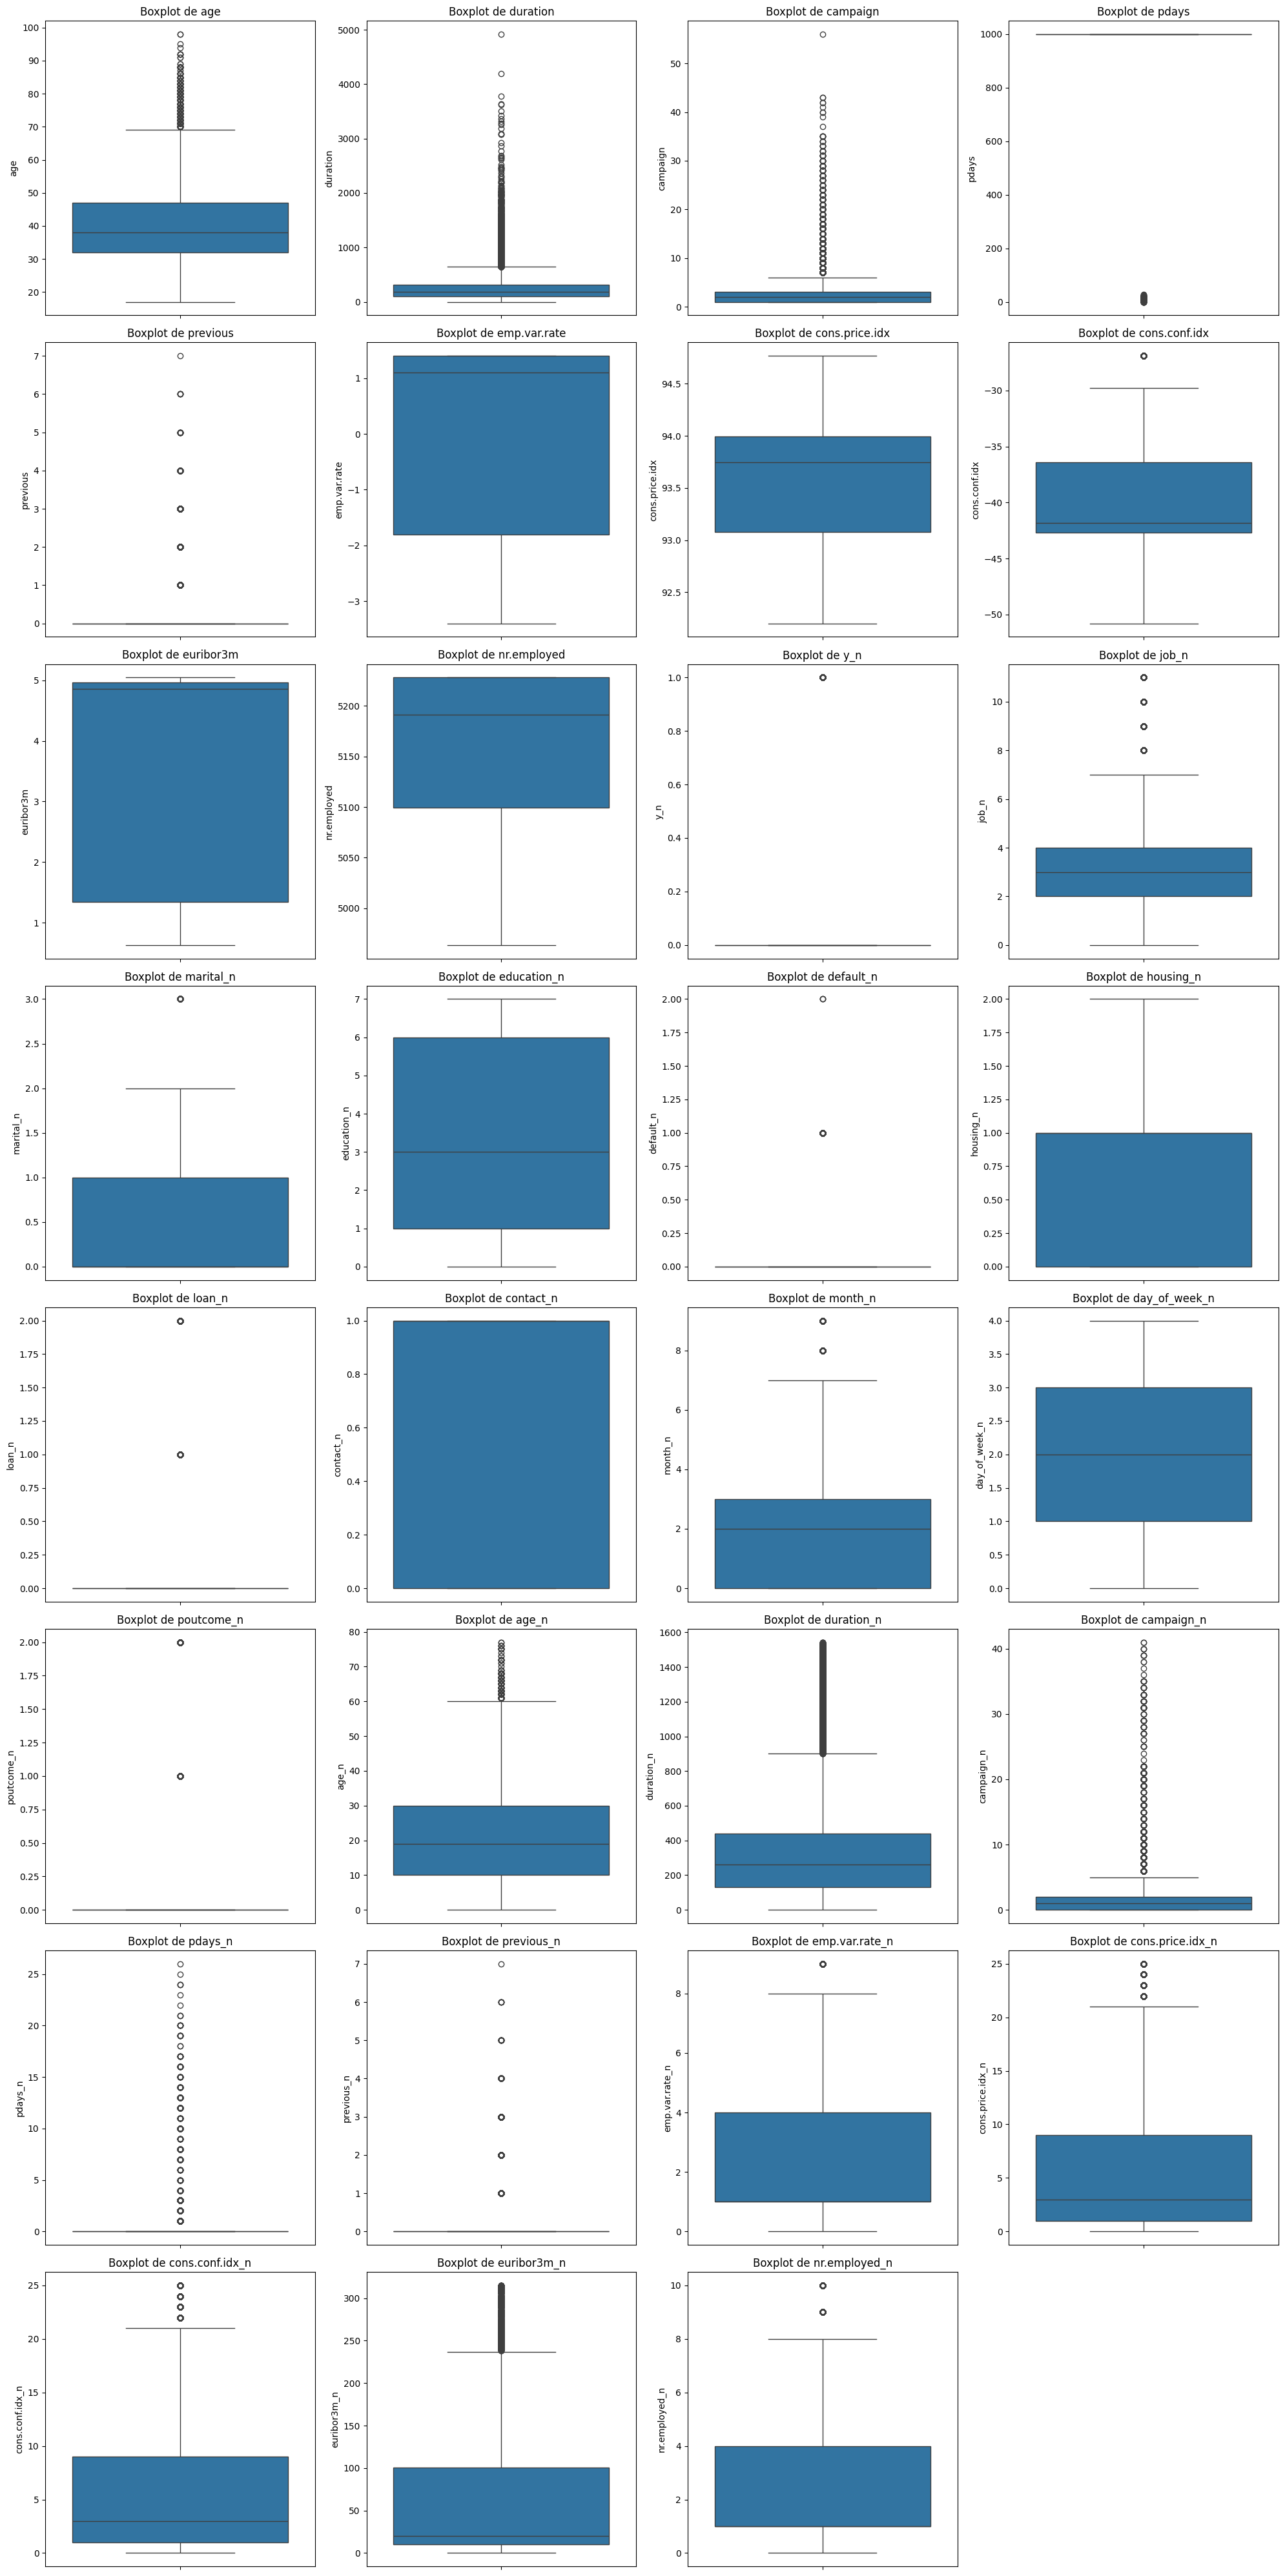

In [142]:
def generar_boxplots_automaticos(df):
   
    # Filtrar las columnas numéricas del DataFrame, como ya esta normalizado, son todas. 
    columnas = df.columns

    n_columnas = 4
    n_filas = (len(columnas) + n_columnas - 1) // n_columnas  # Redondeo hacia arriba

    # Crear la figura y los ejes para los subgráficos
    fig, axis = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 5, n_filas * 5))

    # Aplanar el array de ejes para facilitar la iteración
    axis = axis.flatten()

    # Graficar un boxplot para cada columna del DataFrame
    for i, col in enumerate(columnas):
        sns.boxplot(ax=axis[i], data=df, y=col)
        axis[i].set_title(f'Boxplot de {col}')

    # Si hay menos gráficos que subgráficos, ocultar los ejes restantes
    for j in range(i + 1, len(axis)):
        axis[j].axis('off')

    # Ajustar el layout para evitar que los gráficos se sobrepongan
    plt.tight_layout()
    plt.show()

generar_boxplots_automaticos(n_data)

In [143]:
import os 

total_data_con_outliers = n_data.copy() 
total_data_sin_outliers = n_data.copy()

col_con_outliers = ["age", "duration", "campaign", "pdays", "job_n", "poutcome_n", "loan_n", "default_n", "previous", "month_n"] # añadir outliers

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in col_con_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'duration': [0, np.float64(644.5)],
 'campaign': [1, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)],
 'job_n': [0, np.float64(7.0)],
 'poutcome_n': [np.float64(0.0), np.float64(0.0)],
 'loan_n': [np.float64(0.0), np.float64(0.0)],
 'default_n': [np.float64(0.0), np.float64(0.0)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'month_n': [0, np.float64(7.5)]}

In [144]:
from sklearn.preprocessing import MinMaxScaler

def normalize_and_create(data, columns_to_normalize, new_column_name='econ_index'):

    # Crear un objeto MinMaxScaler
    scaler = MinMaxScaler()

    # Normalizar las columnas especificadas
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

    # Crear la nueva variable 'risk' como la media de las columnas normalizadas
    data[new_column_name] = data[columns_to_normalize].mean(axis=1)

    return data

# Definir las columnas que se van a normalizar
columns_to_normalize_econ_index = ['emp.var.rate', 'euribor3m', 'nr.employed']

# Normalizar y crear la variable 'risk' para el conjunto con outliers
total_data_con_outliers = normalize_and_create(total_data_con_outliers, columns_to_normalize_econ_index)

# Normalizar y crear la variable 'risk' para el conjunto sin outliers
total_data_sin_outliers = normalize_and_create(total_data_sin_outliers, columns_to_normalize_econ_index)

In [145]:
total_data_con_outliers.drop(columns_to_normalize_econ_index, axis= 1, inplace= True)
total_data_sin_outliers.drop(columns_to_normalize_econ_index, axis= 1, inplace= True)

In [146]:
total_data_sin_outliers

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,y_n,job_n,marital_n,...,duration_n,campaign_n,pdays_n,previous_n,emp.var.rate_n,cons.price.idx_n,cons.conf.idx_n,euribor3m_n,nr.employed_n,econ_index
0,56.0,261.0,1.0,999.0,0.0,93.994,-36.4,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0.918205
1,57.0,149.0,1.0,999.0,0.0,93.994,-36.4,0,1.0,0,...,1,0,0,0,0,0,0,0,0,0.918205
2,37.0,226.0,1.0,999.0,0.0,93.994,-36.4,0,1.0,0,...,2,0,0,0,0,0,0,0,0,0.918205
3,40.0,151.0,1.0,999.0,0.0,93.994,-36.4,0,2.0,0,...,3,0,0,0,0,0,0,0,0,0.918205
4,56.0,307.0,1.0,999.0,0.0,93.994,-36.4,0,1.0,0,...,4,0,0,0,0,0,0,0,0,0.918205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,334.0,1.0,999.0,0.0,94.767,-50.8,1,5.0,0,...,629,0,0,0,9,25,25,315,10,0.189496
41184,46.0,383.0,1.0,999.0,0.0,94.767,-50.8,0,3.0,0,...,339,0,0,0,9,25,25,315,10,0.189496
41185,56.0,189.0,2.0,999.0,0.0,94.767,-50.8,0,5.0,0,...,191,1,0,0,9,25,25,315,10,0.189496
41186,44.0,442.0,1.0,999.0,0.0,94.767,-50.8,1,4.0,0,...,273,0,0,0,9,25,25,315,10,0.189496


In [147]:
print(n_data.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_n',
       'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age_n',
       'duration_n', 'campaign_n', 'pdays_n', 'previous_n', 'emp.var.rate_n',
       'cons.price.idx_n', 'cons.conf.idx_n', 'euribor3m_n', 'nr.employed_n'],
      dtype='object')


In [148]:
print(total_data_sin_outliers.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'y_n', 'job_n', 'marital_n', 'education_n',
       'default_n', 'housing_n', 'loan_n', 'contact_n', 'month_n',
       'day_of_week_n', 'poutcome_n', 'age_n', 'duration_n', 'campaign_n',
       'pdays_n', 'previous_n', 'emp.var.rate_n', 'cons.price.idx_n',
       'cons.conf.idx_n', 'euribor3m_n', 'nr.employed_n', 'econ_index'],
      dtype='object')


In [154]:
#ensayo 2

from sklearn.model_selection import train_test_split
import openpyxl

target = 'y'  # Usar 'y' como la variable original
norm_target = 'y_n'  # Usar 'y_n' como la versión factorizada

num_variables = total_data_con_outliers.copy().drop("y_n", axis= 1).columns.tolist()

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("y_n", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("y_n", axis = 1)[num_variables]
y = total_data_con_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,...,duration_n,campaign_n,pdays_n,previous_n,emp.var.rate_n,cons.price.idx_n,cons.conf.idx_n,euribor3m_n,nr.employed_n,econ_index
12348,29,286,3,999,0,93.918,-42.7,10,0,2,...,102,2,0,0,1,2,2,11,1,0.993501
8565,50,178,6,999,0,94.465,-41.8,2,1,6,...,46,5,0,0,1,1,1,6,1,0.986322
21424,29,103,4,999,0,93.444,-36.1,2,1,6,...,464,3,0,0,1,3,3,19,1,0.993803
3316,35,135,1,999,0,93.994,-36.4,2,1,6,...,53,0,0,0,0,0,0,4,0,0.918432
33246,40,418,1,999,0,92.893,-46.2,3,1,1,...,470,0,0,0,4,9,9,106,4,0.331522


In [155]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,...,duration_n,campaign_n,pdays_n,previous_n,emp.var.rate_n,cons.price.idx_n,cons.conf.idx_n,euribor3m_n,nr.employed_n,econ_index
12348,-1.058427,0.112453,0.152155,0.195697,-0.348601,0.589534,-0.470932,2.600348,-0.734095,-0.582336,...,-0.833050,0.133339,-0.139268,-0.348601,-0.549285,-0.558698,-0.558698,-0.667854,-0.540103,0.828459
8565,0.954767,-0.305973,1.229538,0.195697,-0.348601,1.534740,-0.276368,-0.679177,0.698859,1.248416,...,-1.040782,1.143195,-0.139268,-0.348601,-0.549285,-0.746570,-0.746570,-0.744868,-0.540103,0.806383
21424,-1.058427,-0.596546,0.511282,0.195697,-0.348601,-0.229530,0.955866,-0.679177,0.698859,1.248416,...,0.509785,0.469958,-0.139268,-0.348601,-0.549285,-0.370827,-0.370827,-0.544633,-0.540103,0.829388
3316,-0.483229,-0.472568,-0.566100,0.195697,-0.348601,0.720860,0.891011,-0.679177,0.698859,1.248416,...,-1.014815,-0.539898,-0.139268,-0.348601,-1.029115,-0.934441,-0.934441,-0.775673,-0.974910,0.597621
33246,-0.003897,0.623862,-0.566100,0.195697,-0.348601,-1.181648,-1.227566,-0.269237,0.698859,-1.040024,...,0.532041,-0.539898,-0.139268,-0.348601,0.890206,0.756403,0.756403,0.795397,0.764317,-1.207117


In [156]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,job_n,marital_n,education_n,...,duration_n,campaign_n,pdays_n,previous_n,emp.var.rate_n,cons.price.idx_n,cons.conf.idx_n,euribor3m_n,nr.employed_n,econ_index
12348,0.148148,0.058154,0.036364,1.0,0.0,0.669135,0.338912,0.909091,0.000000,0.285714,...,0.066105,0.048780,0.0,0.0,0.111111,0.08,0.08,0.034921,0.1,0.999097
8565,0.407407,0.036194,0.090909,1.0,0.0,0.882307,0.376569,0.181818,0.333333,0.857143,...,0.029812,0.121951,0.0,0.0,0.111111,0.04,0.04,0.019048,0.1,0.991297
21424,0.148148,0.020943,0.054545,1.0,0.0,0.484412,0.615063,0.181818,0.333333,0.857143,...,0.300713,0.073171,0.0,0.0,0.111111,0.12,0.12,0.060317,0.1,0.999425
3316,0.222222,0.027450,0.000000,1.0,0.0,0.698753,0.602510,0.181818,0.333333,0.857143,...,0.034349,0.000000,0.0,0.0,0.000000,0.00,0.00,0.012698,0.0,0.917531
33246,0.283951,0.084994,0.000000,1.0,0.0,0.269680,0.192469,0.272727,0.333333,0.142857,...,0.304601,0.000000,0.0,0.0,0.444444,0.36,0.36,0.336508,0.4,0.279836


In [157]:
print(X_train_con_outliers_scal.isnull().sum())

age                 0
duration            0
campaign            0
pdays               0
previous            0
cons.price.idx      0
cons.conf.idx       0
job_n               0
marital_n           0
education_n         0
default_n           0
housing_n           0
loan_n              0
contact_n           0
month_n             0
day_of_week_n       0
poutcome_n          0
age_n               0
duration_n          0
campaign_n          0
pdays_n             0
previous_n          0
emp.var.rate_n      0
cons.price.idx_n    0
cons.conf.idx_n     0
euribor3m_n         0
nr.employed_n       0
econ_index          0
dtype: int64
